In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from scipy import interpolate
from scipy.interpolate import griddata

% matplotlib inline

In [30]:
yr=1979

In [31]:
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
lon=coordinate_obj.variables['nav_lon'][:,:]
lat=coordinate_obj.variables['nav_lat'][:,:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]


nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*%s*09_*.nc'%yr))#*_ptrc_T*.nc'))

print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_197909_v02r00.nc']


In [34]:


nasa=nc.Dataset(nc_filename[0])
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
x,y = m(nasa_lon,nasa_lat)
x_lon,y_lat = m(lon,lat)


nasa_ice=nasa.variables['goddard_bt_seaice_conc_monthly'][:]

In [55]:

x_=x[150:300,60:250]; y_=y[150:300,60:250];nasa_ice_=np.copy(nasa_ice[0,150:300,60:250])


if yr<1987:
    latlim=84.35
else:
    latlim=86.65
a=np.where( (nasa_lat[150:300,60:250] >latlim))
#calculate nearby conc.
temp =np.copy(nasa_ice[0,150:300,60:250])
temp[a[0],a[1]] = np.ma.masked
b=np.where((nasa_lat[150:300,60:250] < latlim) & (nasa_lat[150:300,60:250] > latlim-0.5) )
avg = np.average(temp[b[0],b[1]] )

nasa_ice_[a[0],a[1]] = avg
print 'nearby avg. ice ',avg

points=np.c_[np.ravel(x_),np.ravel(y_)]
values = np.ravel(nasa_ice_)


icon_ = griddata(points, values, (x_lon[400:,:], y_lat[400:,:]), method='nearest')

nearby avg. ice  0.978886


In [56]:
b=np.where(lat[400:,:]<70)
icon_[b[0],b[1]]=0

In [59]:
icon_ANHA=np.zeros((800,544))
icon_ANHA[400:,:]=icon_

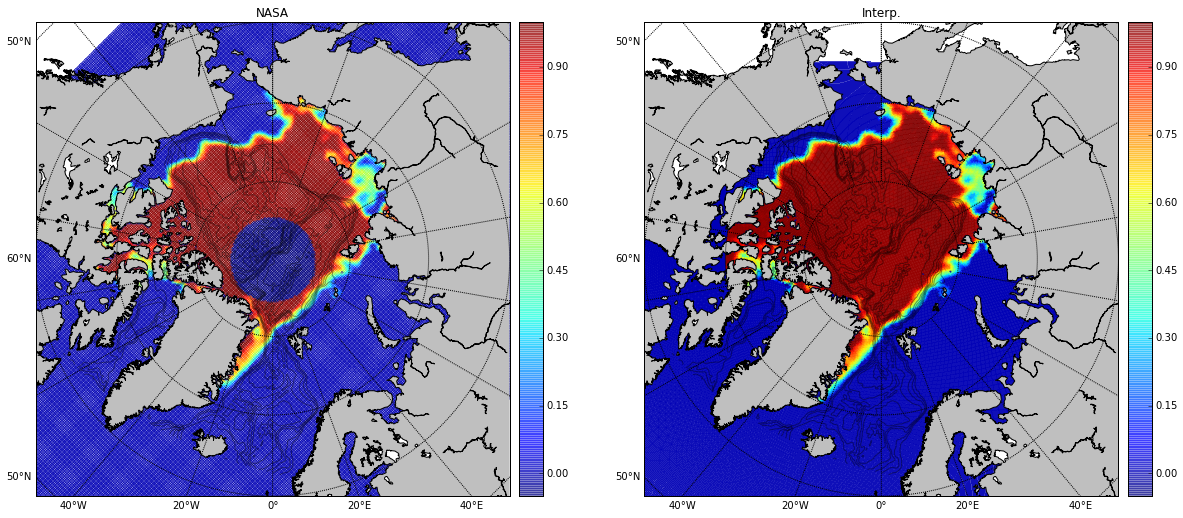

In [60]:
fig = plt.figure(figsize=(20,10))

ax= fig.add_subplot(121)

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x,y,nasa_ice[0,:,:],alpha=0.5);m.colorbar()
plt.title('NASA')


ax= fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x_lon[:,:],y_lat[:,:],icon_ANHA,alpha=0.5);m.colorbar()
plt.title('Interp.')
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [61]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]


nemo = nc.Dataset('/ocean/xiaoxiny/research/data/forcing/Ice/ANHA4-ENG3_icemod_y%sm09.nc'%yr, 'w')
nemo.description = 'ice' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('ileadfra', 'float32', ('y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[:,:]=icon_ANHA[:,:]
nemo.close()


(800, 544)


In [62]:
# all in one

In [63]:
for yr in range(1979,2015):
    coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
    coordinate_obj=nc.Dataset(coordinate_name[0])
    lon=coordinate_obj.variables['nav_lon'][:,:]
    lat=coordinate_obj.variables['nav_lat'][:,:]
    bathy=nc.Dataset(
        '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
    bathy=bathy.variables['Bathymetry'][400:,:]


    nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*%s*09_*.nc'%yr))#*_ptrc_T*.nc'))

    print("found *.nc file: \n{}".format(nc_filename))
    
    nasa=nc.Dataset(nc_filename[0])
    nasa_lat=nasa.variables['latitude'][:]
    nasa_lon=nasa.variables['longitude'][:]

    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
    x,y = m(nasa_lon,nasa_lat)
    x_lon,y_lat = m(lon,lat)


    nasa_ice=nasa.variables['goddard_bt_seaice_conc_monthly'][:]
    
    x_=x[150:300,60:250]; y_=y[150:300,60:250];nasa_ice_=np.copy(nasa_ice[0,150:300,60:250])


    if yr<1987:
        latlim=84.35
    else:
        latlim=86.65
    a=np.where( (nasa_lat[150:300,60:250] >latlim))
    #calculate nearby conc.
    temp =np.copy(nasa_ice[0,150:300,60:250])
    temp[a[0],a[1]] = np.ma.masked
    b=np.where((nasa_lat[150:300,60:250] < latlim) & (nasa_lat[150:300,60:250] > latlim-0.5) )
    avg = np.average(temp[b[0],b[1]] )

    nasa_ice_[a[0],a[1]] = avg
    print 'nearby avg. ice ',avg

    points=np.c_[np.ravel(x_),np.ravel(y_)]
    values = np.ravel(nasa_ice_)


    icon_ = griddata(points, values, (x_lon[400:,:], y_lat[400:,:]), method='nearest')
    
    b=np.where(lat[400:,:]<70)
    icon_[b[0],b[1]]=0
    
    icon_ANHA=np.zeros((800,544))
    icon_ANHA[400:,:]=icon_
    
    lat = nav_lat
    lon = nav_lon
    print lat.shape
    xmax = lat.shape[1]
    ymax = lat.shape[0]


    nemo = nc.Dataset('/ocean/xiaoxiny/research/data/forcing/Ice/ANHA4-ENG3_icemod_y%sm09.nc'%yr, 'w')
    nemo.description = 'ice' 

    # dimensions
    nemo.createDimension('x', xmax)
    nemo.createDimension('y', ymax)
    nemo.createDimension('time_counter', None)

    # variables
    # latitude and longitude
    nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
    nav_lat = lat
    x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
    nav_lon = lon
    # time
    time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
    time_counter.units = 'non-dim'
    time_counter[0] = 1
    # runoff
    Pa = nemo.createVariable('ileadfra', 'float32', ('y','x'), zlib=True)
    Pa._units = 'arbitrary'
    Pa[:,:]=icon_ANHA[:,:]
    nemo.close()

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_197909_v02r00.nc']
nearby avg. ice  0.978886
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198009_v02r00.nc']
nearby avg. ice  0.990109
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198109_v02r00.nc']
nearby avg. ice  0.986087
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198209_v02r00.nc']
nearby avg. ice  0.989484
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198309_v02r00.nc']
nearby avg. ice  0.98788
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198409_v02r00.nc']
nearby avg. ice  0.973424
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198509_v02r00.nc']
nearby avg. ice  0.97644
(800, 544)
found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc']
nearby avg. ice